In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import svm
import time
import random
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier

In [2]:
project_dir = "D:\Studies\Machine_Learning\Assignment_2"

train_dir = os.path.join(project_dir,'Training')
test_dir = os.path.join(project_dir,'Testing')

categories = ["Angry","Fear","Happy","Neutral","Sad","Suprise"]

#data loading routine
def load_data(data_dir):
    xy_data = []
    for category in categories:
        category_dir = os.path.join(data_dir,category)
        for img_dir in os.listdir(category_dir):
            class_num = categories.index(category)
            path = os.path.join(data_dir,category_dir,img_dir)
            img_array = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            xy_data.append([img_array,class_num])
    return xy_data
            
xy_train = load_data(train_dir)
xy_test = load_data(test_dir)

random.shuffle(xy_train)
random.shuffle(xy_test)


In [3]:
x_train = []
y_train = []
for x,y in xy_train:
    x_train.append(x)
    y_train.append(y)

x_test = []
y_test = []
for x,y in xy_test:
    x_test.append(x)
    y_test.append(y)

In [4]:
unique, y_train_counts = np.unique(y_train, return_counts=True)
print("y_train_counts",y_train_counts)
print("min count", min(y_train_counts))

y_train_counts [3995 4097 7215 4965 4830 3171]
min count 3171


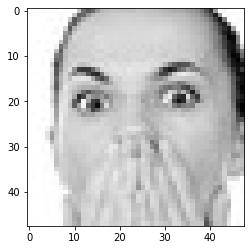

Suprise


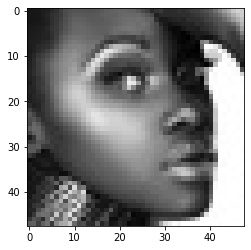

Neutral


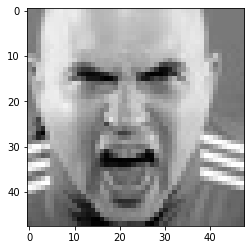

Angry


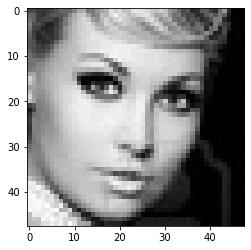

Neutral


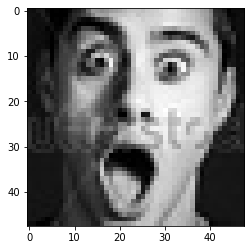

Suprise


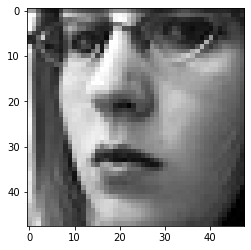

Angry


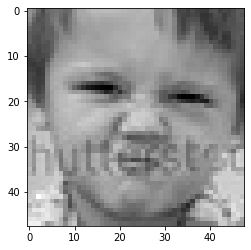

Angry


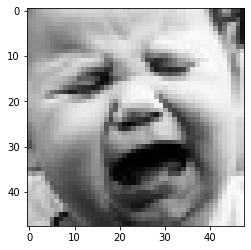

Sad


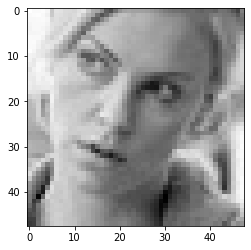

Neutral


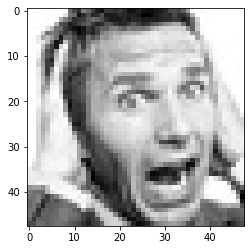

Fear


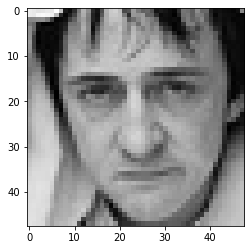

Sad


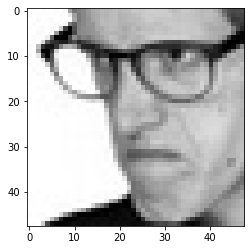

Angry


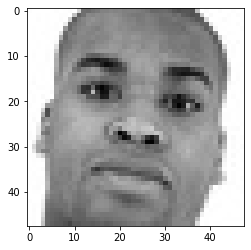

Fear


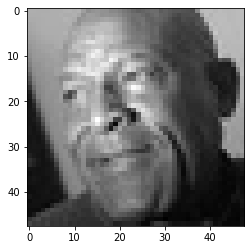

Happy


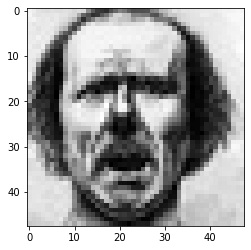

Fear


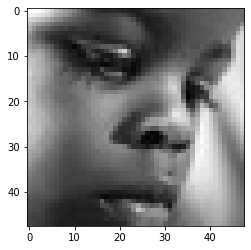

Neutral


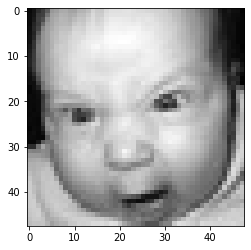

Angry


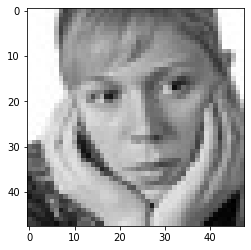

Sad


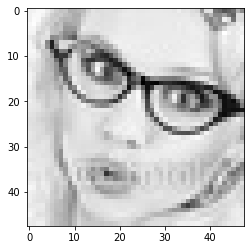

Suprise


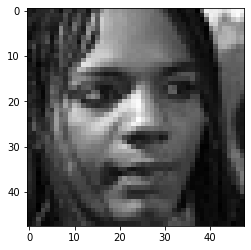

Neutral


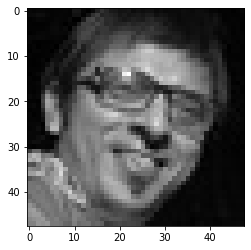

Happy


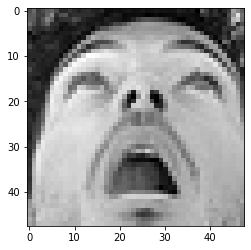

Suprise


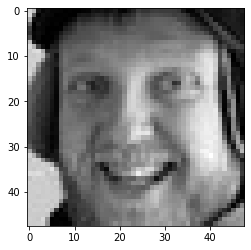

Happy


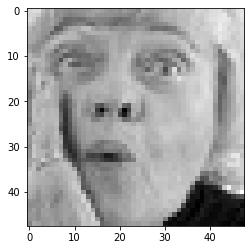

Suprise


In [5]:
for i in range(24):
    plt.imshow(x_train[i], cmap='gray')
    plt.show()
    print(categories[y_train[i]])

In [6]:
#Converting 2D img arrays into vectors
x_train_vectorized = [x.reshape(-1) for x in x_train]
x_test_vectorized = [x.reshape(-1) for x in x_test]

In [7]:
n_estimators = 10
start = time.time()
mdl = OneVsRestClassifier(BaggingClassifier(svm.SVC(kernel='rbf',class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators,n_jobs=8))
mdl.fit(x_train_vectorized, y_train)
end = time.time()
print("train time:", end-start)

train time: 178.13471055030823


In [8]:
start = time.time()
score = mdl.score(x_test_vectorized,y_test)
end = time.time()
print("score time:",end-start)
print("score:",score)

score time: 419.5109736919403
score: 0.41375406820432997


In [9]:
pca_95percent = PCA(n_components=0.98)
pca_95percent.fit(x_train_vectorized)
x_train_pca = pca_95percent.transform(x_train_vectorized)
x_test_pca = pca_95percent.transform(x_test_vectorized)

print("num components:", len(x_train_pca[0]))

num components: 588


In [10]:
n_estimators = 10
start = time.time()
mdl_pca = OneVsRestClassifier(BaggingClassifier(svm.SVC(kernel='rbf',class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators,n_jobs=8))
mdl_pca.fit(x_train_pca, y_train)
end = time.time()
print("train time:", end-start)

train time: 51.40906047821045


In [11]:
start = time.time()
score = mdl_pca.score(x_test_pca,y_test)
end = time.time()

print("score time:", end-start)
print("score:",score)

score time: 100.96194386482239
score: 0.41290505164850716


In [12]:
preds = mdl_pca.predict(x_test_pca)

In [13]:
type(preds)

numpy.ndarray

In [14]:
unique, y_test_counts = np.unique(y_test, return_counts=True)
unique, preds_counts = np.unique(preds, return_counts=True)
np.count_nonzero(np.equal(preds,y_test))/len(y_test)
print("y_test_counts",y_test_counts)
print("preds_counts",preds_counts)

y_test_counts [ 958 1024 1774 1233 1247  831]
preds_counts [ 590  626 2186 1553 1268  844]


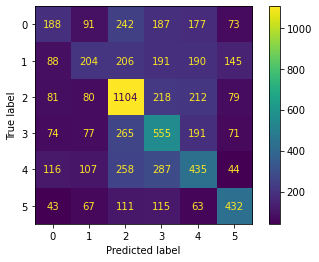

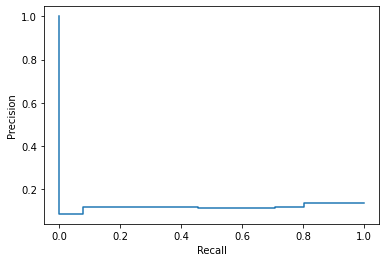

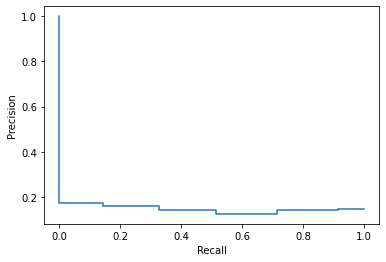

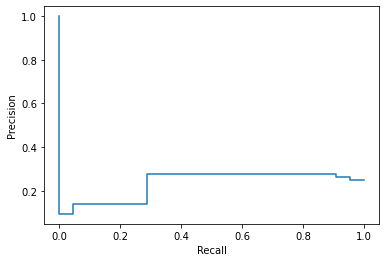

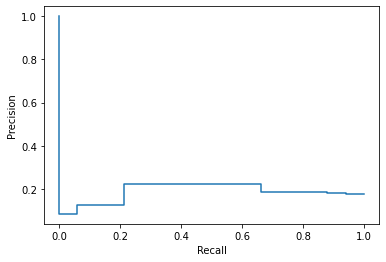

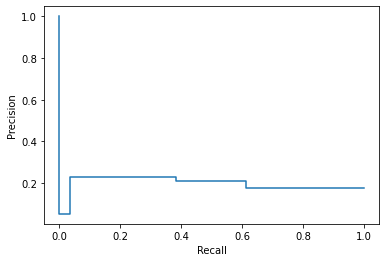

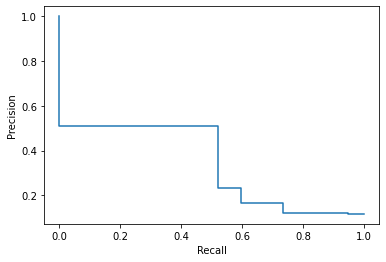

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mdl.classes_)
disp.plot()
plt.show()

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
for i in range(6):
    prec, recall, _ = precision_recall_curve(y_test, preds, pos_label=mdl.classes_[i])
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    